In [63]:
import pandas as pd
df = pd.read_csv('/Users/allannganga/Desktop/School/course-project-solo_113/Data/Data:Raw/fatal-police-shootings-data.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,6245,Gregory Putnik,2020-10-18,shot,gun,32.0,M,W,Fresno,CA,False,attack,Foot,False,-119.821,36.758,True
5712,6247,Tutuila Pine Koonwaiyou,2020-10-18,shot,gun,37.0,M,NaN,Tooele,UT,False,other,Not fleeing,False,-112.298,40.531,True
5713,6242,NaN,2020-10-19,shot,gun,43.0,M,NaN,South Milwaukee,WI,False,attack,Not fleeing,False,-87.856,42.899,True
5714,6243,Paul Sulkowski,2020-10-19,shot,knife,46.0,M,NaN,Coram,NY,False,other,NaN,False,-73.010,40.875,True


# Build and test your method chain(s)

In [163]:
import pandas as pd
import numpy as np

df = (pd.read_csv('fatal-police-shootings-data.csv')
           .drop(['latitude', 'longitude', 'is_geocoding_exact', 'manner_of_death', 'flee'], axis=1)
           .rename(columns={'race': 'ethnicity'})
           .assign(armed= lambda x: np.where(x['armed']=='unarmed', False, True))
           .assign(threat_level= lambda x: np.where(x['threat_level']=='attack', True, None))
           .assign(Armed_Attack= lambda x: np.where(x['armed']== x['threat_level'], True, False))
           .reset_index(drop=True))
df
          


,id,name,date,armed,age,gender,ethnicity,city,state,signs_of_mental_illness,threat_level,body_camera,Armed_Attack
0,3,Tim Elliot,2015-01-02,True,53.0,M,A,Shelton,WA,True,True,False,True
1,4,Lewis Lee Lembke,2015-01-02,True,47.0,M,W,Aloha,OR,False,True,False,True
2,5,John Paul Quintero,2015-01-03,False,23.0,M,H,Wichita,KS,False,None,False,False
3,8,Matthew Hoffman,2015-01-04,True,32.0,M,W,San Francisco,CA,True,True,False,True
4,9,Michael Rodriguez,2015-01-04,True,39.0,M,H,Evans,CO,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,6245,Gregory Putnik,2020-10-18,True,32.0,M,W,Fresno,CA,False,True,False,True
5712,6247,Tutuila Pine Koonwaiyou,2020-10-18,True,37.0,M,NaN,Tooele,UT,False,None,False,False
5713,6242,NaN,2020-10-19,True,43.0,M,NaN,South Milwaukee,WI,False,True,False,True
5714,6243,Paul Sulkowski,2020-10-19,True,46.0,M,NaN,Coram,NY,False,None,False,False


# Wrap your method chain(s) in a function

In [49]:
##Step 2: Wrap your method chain(s) in a function
import pandas as pd
import numpy as np


def load_and_process(url_or_path_to_csv_file):
    

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
        pd.read_csv('url_or_path_to_csv_file')
        .drop(['latitude', 'longitude', 'is_geocoding_exact', 'manner_of_death', 'flee'], axis=1)
        .rename(columns={'race': 'ethnicity'})
             
             
    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (df1
           .assign(armed= lambda x: np.where(x['armed']=='unarmed', False, True))
           .assign(threat_level= lambda x: np.where(x['threat_level']=='attack', True, None))
           .assign(Armed_Attack= lambda x: np.where(x['armed']== x['threat_level'], True, False))
           .reset_index(drop=True)
          )
 

return df2 



In [175]:
from Scripts import project_functions 
df = project_functions.load_and_process('fatal-police-shootings-data.csv')
df

,name,date,armed,age,gender,ethnicity,city,state,signs_of_mental_illness,threat_level,body_camera,Armed_Attack
0,Tim Elliot,2015-01-02,True,53.0,M,A,Shelton,WA,True,True,False,True
1,Lewis Lee Lembke,2015-01-02,True,47.0,M,W,Aloha,OR,False,True,False,True
2,John Paul Quintero,2015-01-03,False,23.0,M,H,Wichita,KS,False,None,False,False
3,Matthew Hoffman,2015-01-04,True,32.0,M,W,San Francisco,CA,True,True,False,True
4,Michael Rodriguez,2015-01-04,True,39.0,M,H,Evans,CO,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
5711,Gregory Putnik,2020-10-18,True,32.0,M,W,Fresno,CA,False,True,False,True
5712,Tutuila Pine Koonwaiyou,2020-10-18,True,37.0,M,NaN,Tooele,UT,False,None,False,False
5713,NaN,2020-10-19,True,43.0,M,NaN,South Milwaukee,WI,False,True,False,True
5714,Paul Sulkowski,2020-10-19,True,46.0,M,NaN,Coram,NY,False,None,False,False


# Task 4: Conduct an Exploratory Data Analysis (EDA) on your dataset.¶


#### Observation 1:

* The mean age is surprisingly high. The youngest victim of fatal police shootings was only six

In [194]:
from Scripts import project_functions 
df = project_functions.load_and_process('fatal-police-shootings-data.csv')
df.describe()

,age
count,5456.000000
mean,37.139113
std,13.068117
min,6.000000
25%,27.000000
50%,35.000000
75%,46.000000
max,91.000000


#### Observation 2:

* Although people from white ehtnic backgrounds are the most frequent victims, Hispanic and African American ethnicities are high. This becomes particularly alarming considering the population proportion of white ethnicities to either Hispanic or African American ethnicities 

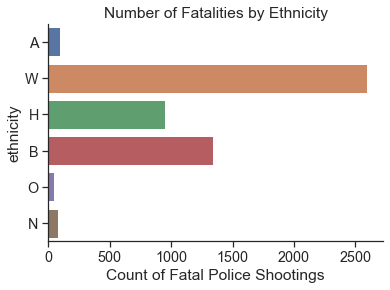

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from Scripts import project_functions 
df = project_functions.load_and_process('fatal-police-shootings-data.csv')

sns.set_theme(style="ticks", font_scale=1.3,)
plt.rc("axes.spines", top=False, right=False)

cov = sns.countplot(y='ethnicity', data=df)
plt.title('Number of Fatalities by Ethnicity')
cov.set(xlabel='Count of Fatal Police Shootings', ylabel='ethnicity')
plt.show()


#### Observation 3:
* The number of police shootings seems fairly constant throught the past 5 years. There are notable differences in 2020 most probably due to the coronavirus pandemic.

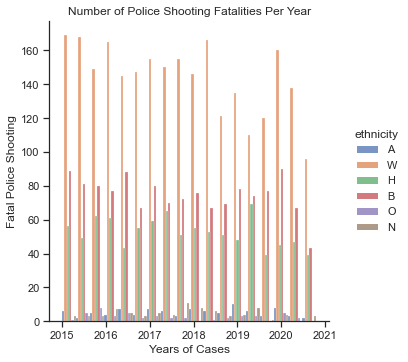

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from Scripts import project_functions 
df = project_functions.load_and_process('fatal-police-shootings-data.csv')

df['Date'] = pd.to_datetime(df['date'])
df.Date.dt.date

sns.set_theme(style="ticks", font_scale=1,)
cov = sns.displot(data = df, x="Date", hue="ethnicity", multiple="dodge")
plt.title('Number of Police Shooting Fatalities Per Year')
cov.set(xlabel= 'Years of Cases', ylabel='Fatal Police Shooting')
plt.show()

#### Observation 4:
* The distribution of fatal shootings is high in texas and florida. It is important to note that canada is included in the data and as such our society must be cautious of this alarming development.

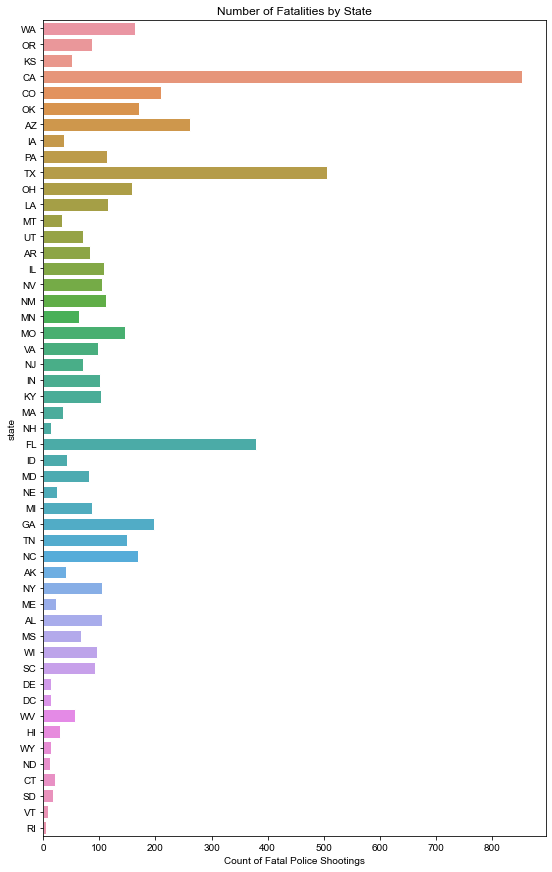

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from Scripts import project_functions 
df = project_functions.load_and_process('fatal-police-shootings-data.csv')

fig, cov=plt.subplots(figsize=(9,15))
sns.set_theme(style="ticks", font_scale=1.,)
plt.rc("axes.spines", top=False, right=False)

cov = sns.countplot(y='state', data=df)
plt.title('Number of Fatalities by State')
cov.set(xlabel='Count of Fatal Police Shootings', ylabel='state')
plt.show()

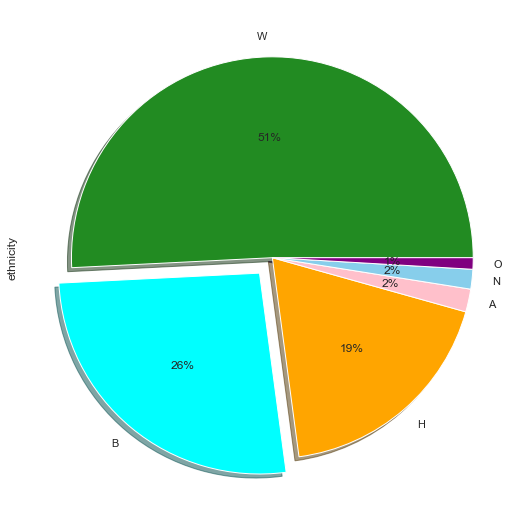

In [53]:
from Scripts import project_functions 
df = project_functions.load_and_process('fatal-police-shootings-data.csv')
fig, ethn=plt.subplots(figsize=(9,15))
explode = [0, 0.1, 0, 0, 0, 0]
colors = ["forestgreen", "cyan", "orange", "pink", "skyblue", "purple" ]
df['ethnicity'].value_counts().plot(kind='pie', explode= explode, colors= colors, autopct='%1.0f%%', shadow=True)




In [ ]:
df.to_csv("df.csv")